In [358]:
!pip install requests python-dotenv pillow numpy

In [359]:
img_dict = {}

for i in range(0, 255):
    img_dict[i] = []

In [360]:
import requests
from dotenv import load_dotenv
import os

load_dotenv()
res = requests.get(
    url=os.environ.get("GIPHY_URL"),
    params={
        "api_key": os.environ.get("GIPHY_API_KEY")
    }
)

res

<Response [200]>

In [361]:
image_url = res.json()['data']['images']['original']['url']

In [362]:
print('image_url : ', image_url)

image_url :  https://media2.giphy.com/media/nBS1w29Lh8o5TKJGGI/giphy.gif?cid=80e5c503uv1buq21a769auqe4bjp0447c9ymherb4ejsa7ih&ep=v1_gifs_random&rid=giphy.gif&ct=g


In [363]:
res = requests.get(url=image_url)

In [364]:
res.headers

{'Connection': 'keep-alive', 'Content-Length': '2028054', 'Last-Modified': 'Thu, 02 Mar 2023 20:55:25 GMT', 'ETag': '"5c9bc36dea1296e9ec01c657bd8e9601"', 'x-amz-server-side-encryption': 'AES256', 'Content-Type': 'image/gif', 'access-control-allow-origin': '*', 'cross-origin-resource-policy': 'cross-origin', 'Accept-Ranges': 'bytes', 'Age': '35727', 'Date': 'Mon, 12 Aug 2024 22:25:21 GMT', 'X-Served-By': 'cache-iad-kcgs7200032-IAD, cache-mad22025-MAD', 'X-Cache': 'HIT, HIT', 'X-Cache-Hits': '168, 0', 'X-Timer': 'S1723501522.750092,VS0,VE1', 'Strict-Transport-Security': 'max-age=15465600', 'cache-control': 'max-age=86400', 'x-robots-tag': 'noai, noimageai'}

In [365]:
from io import BytesIO

In [366]:
image_data = BytesIO(res.content)

In [367]:
import PIL.Image
import PIL.ImageChops

image = PIL.Image.open(image_data).convert('L')

In [368]:
import PIL.ImageStat

i = PIL.ImageStat.Stat(image)
int((PIL.ImageStat.Stat(image)).mean[0])

113

In [369]:
avg_color = int(i.mean[0])

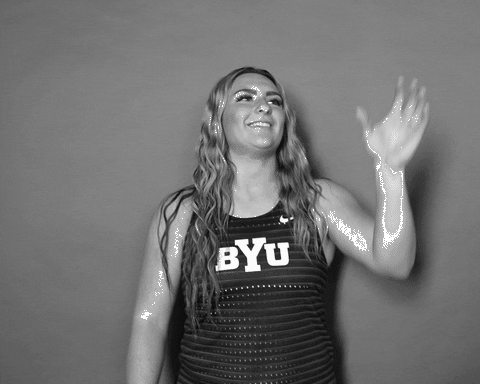

In [370]:
image

In [371]:
img_dict[avg_color].append(image_url)

## create dirs if not exist

In [372]:
# for i in range(0, 255):
#     path = f"./bdd/{i}"
#     os.makedirs(path, exist_ok=True)

# Load an image and resize

In [373]:
image = PIL.Image.open("./images/moicassou.jpg")

In [374]:
gray_image = image.convert("L")

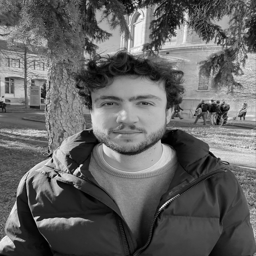

In [375]:
gray_image.resize([256, 256])